<a href="https://colab.research.google.com/github/Gmajorseven/training-data-sci/blob/main/lab8_classification_with_kfold_cross_validation_and_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การจำแนกข้อมูล (Classification with K-Fold Cross Validation and Ensemble): Supervised Learning

### Step 1: การจัดเตรียมข้อมูล

In [1]:
# https://levelup.gitconnected.com/advanced-seaborn-demystifying-the-complex-plots-537582977c8c

import seaborn as sns

data = sns.load_dataset("iris")  # ข้อมูลดอกไอริส
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Step 2: Data Visualization

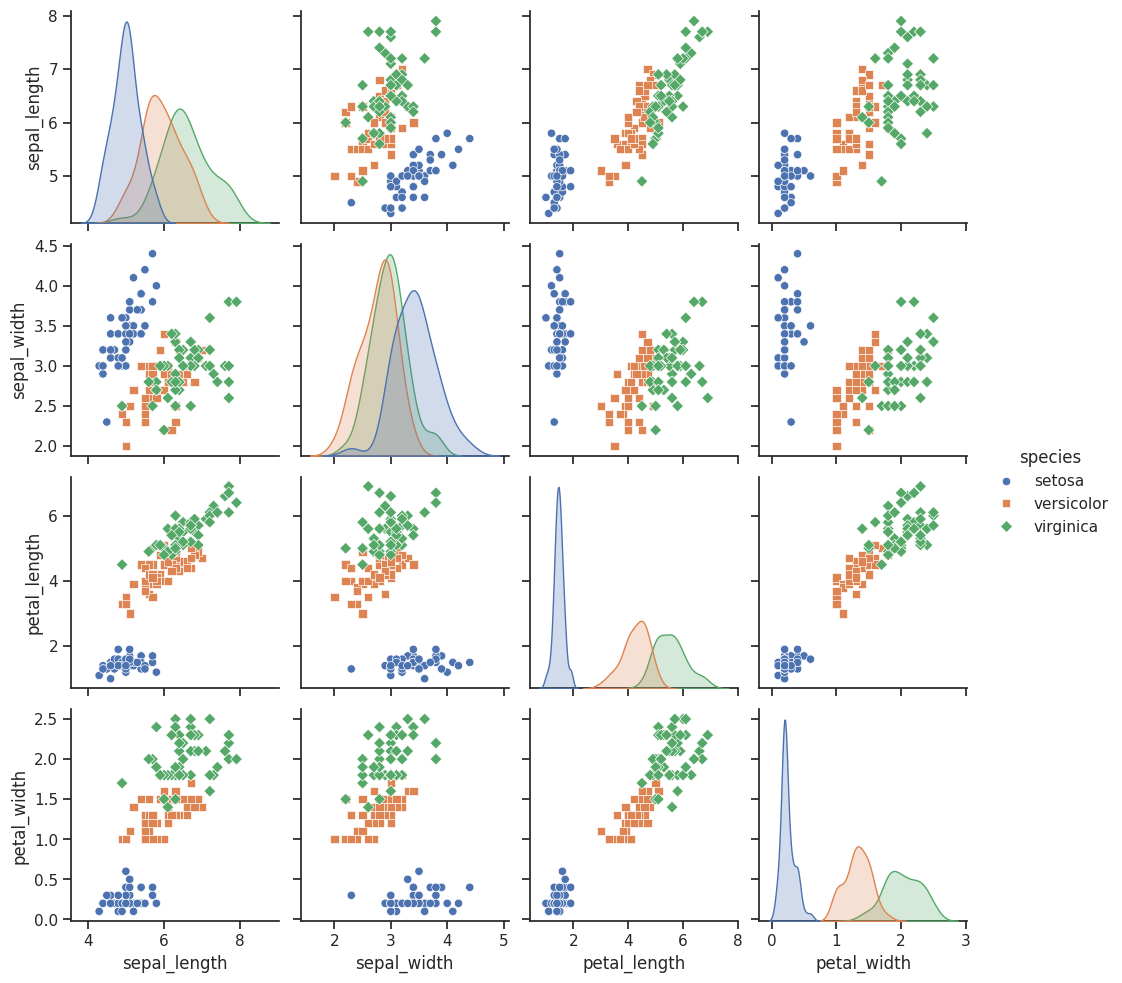

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.pairplot(data, hue="species", markers=["o", "s", "D"])  # Pair Plot เพื่อแสดงความสัมพันธ์ระหว่างคอลัมน์ต่าง ๆ โดยกำหนดสี ด้วยผลเฉลยของ สปีชีย์ (hue="species")

plt.show()

### Step 3: Data Encoding

ทำการแปลงข้อมูลผลเฉลย (Target/Label/Answer) คือ สปีชีย์ (species) ให้เป็นตัวเลข ด้วย Label Encoding

In [3]:
import pandas as pd
from sklearn import preprocessing                 # นำเข้า Library ที่จำเป็นในการจัดเตรียมข้อมูล

label_encoder = preprocessing.LabelEncoder()     # สร้างตัวแปรที่จะทำหน้าที่เข้ารหัส (label_encoder) จาก sklearn.preprocessing
data['species'] = pd.DataFrame(label_encoder.fit_transform(
    data['species']
)) # ทำการแปลงคอลัมน์สปีชีย์ (species) ด้วยวิธีการ Label Encoding แล้วเขียนทับลงคอลัมน์เดิม

data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Step 4: คำนวณความสัมพันธ์ของตัวแปร ด้วย Correlation

Feature Selection: เราจะทราบได้อย่างไร? ว่าควรเลือกคอลัมน์ใดมาใช้ในการเรียนรู้ (Train)

1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)


In [5]:
 corr = data.corr() # คำนวณค่าความสัมพันธ์(correlation) ระหว่างตัวแปรของข้อมูล (data)

<Axes: >

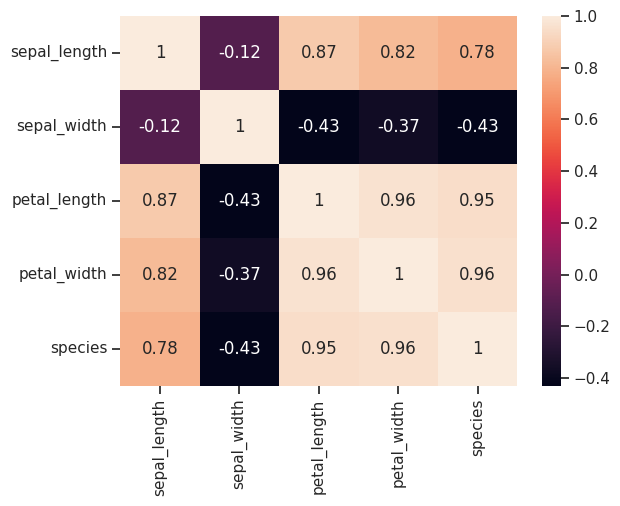

In [6]:
sns.heatmap(corr, annot=True) # แสดงผลของค่าความสัมพันธ์ ระหว่างตัวแปร ด้วย Heat Map

### Step 5: สร้างแบบจำลอง (Model)

In [7]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = GaussianNB()
clf3 = RandomForestClassifier(random_state=1)

### Step 6: K-Fold Cross Validation (ฝึกสอนโดยแบ่งข้อมูลเป็น K ส่วน)

In [8]:
# กำหนดให้ [sepal_width, petal_length] เป็นข้อมูลฝึกสอน (Train) / ลองเปลี่ยนเป็น [petal_length, petal_width]
column_names = ['sepal_width','petal_length']

X, y = data[column_names], data['species']

In [9]:
X

,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


In [10]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [11]:
print('5-Fold Cross Validation')

techniques = ['Logistic Regression', 'Naive Bayes', 'Random Forest'] # เทคนิคที่ใช้ในการสร้างแบบจำลอง

for clf, technique in zip([clf1, clf2, clf3], techniques):
  scores = model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy') # cv=K คือจำนวนของการแบ่ง K-Fold เช่น 5-Fold

  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), technique)) # คำนวณค่าเฉลี่ย / ส่วนเบี่ยงเบนมาตรฐาน / ของแต่ละแบบจำลอง

5-Fold Cross Validation
Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]
Accuracy: 0.94 (+/- 0.04) [Random Forest]


### Step 7: Ensemble Voting

เป็นเทคนิคที่นำเลือก ผลการทำนาย ที่ดีที่สุด จากหลายแบบจำลอง (Multiple Model)


In [13]:
#------------------------------------------------------------------------
# แก้ปัญหา Dependency ของ sklearn.externals ที่ Deprecated ไป
#------------------------------------------------------------------------
import six
import sys

sys.modules['sklearn.externals.six'] = six
#------------------------------------------------------------------------

from mlxtend.classifier import EnsembleVoteClassifier # EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1, 1, 1]) # ลองเปลี่ยนค่า weights อยู่ระหว่าง [0-1]

techniques = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Ensemble'] # เทคนิคที่ใช้ในการสร้างแบบจำลอง

for clf, technique in zip([clf1, clf2, clf3, eclf], techniques):
  scores = model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy') # cv=K คือจำนวนของการแบ่ง K-Fold

  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), technique)) # คำนวณค่าเฉลี่ย / ส่วนเบี่ยงเบนมาตรฐาน / ของแต่ละแบบจำลอง


Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


### Step 8: Data Visualization


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature nam

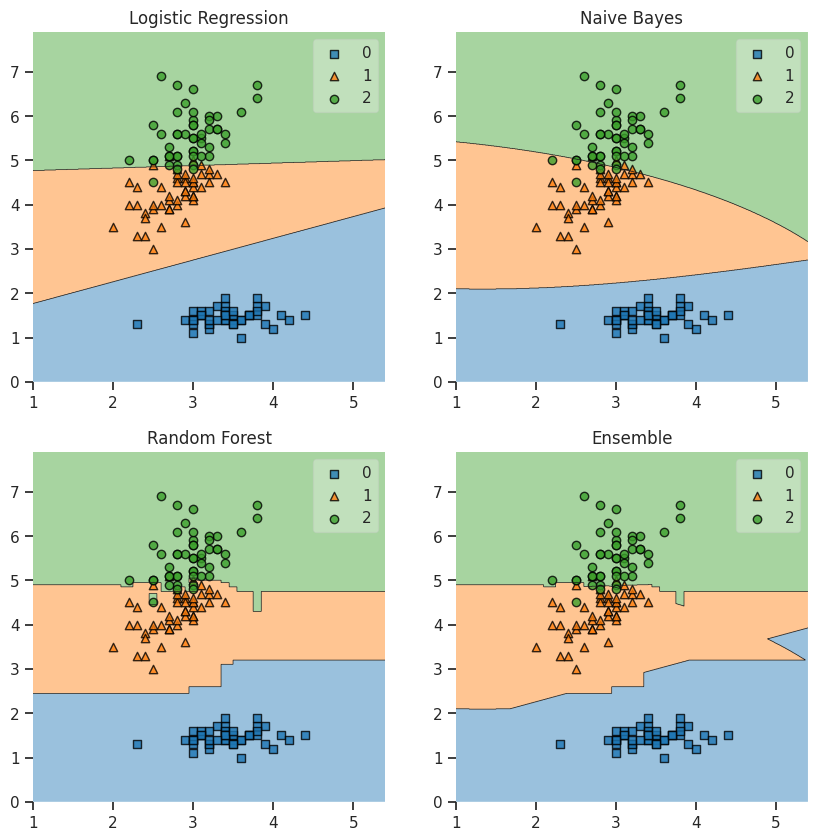

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions # plot_decision_regions

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10, 10))

techniques = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Ensemble'] # เทคนิคที่ใช้ในการสร้างแบบจำลอง

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                                techniques,
                                itertools.product([0, 1], repeat=2)):
    clf.fit(X, y) # ระบุค่าที่ต้องการนำไปฝึก (X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])

    fig = plot_decision_regions(X=X.values, y=y.values, clf=clf)  # ระบุข้อมูลที่ต้องใช้ในการแสดงกราฟ X, y, clf
    plt.title(lab)